# Part 4 Penalized Regression

In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from arch.unitroot import ADF
from arch.unitroot.cointegration import DynamicOLS

import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics import tsaplots
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

## Consumption and Income 자료


Consumption : 가계의 최종소비지출

Income   	: 국민총소득

Money    	: 본원통화


In [2]:
Con_In_dt = pd.read_csv('consumption_income_money.csv', index_col='date' ,header=0, parse_dates=['date'])
print(Con_In_dt.isnull().sum())
Con_In_dt

Consumption    0
Income         0
Money          0
dtype: int64


,Consumption,Income,Money
date,,,
1970-12-31,551.1,787.5,299.6
1971-03-31,583.7,820.8,279.1
1971-06-30,623.5,856.4,290.3
1971-09-30,667.4,873.9,308.7
1971-12-31,674.0,913.0,288.2
...,...,...,...
2021-12-31,236806.5,534312.8,248785.5
2022-03-31,237331.1,539189.3,265200.8
2022-06-30,248378.0,546261.6,283469.8


### EDA

In [3]:
Con_In_dt.describe()

,Consumption,Income,Money
count,209.000000,209.000000,209.000000
mean,84796.594258,176443.876077,51075.705646
std,79136.018235,173054.698769,67458.114635
min,551.100000,787.500000,274.100000
25%,10148.000000,17604.700000,3557.800000
50%,65078.000000,126635.400000,23079.800000
75%,153071.800000,308686.600000,71710.100000
max,255489.200000,548212.600000,283469.800000


In [4]:
Con_In_dt.corr()

,Consumption,Income,Money
Consumption,1.000000,0.997238,0.907671
Income,0.997238,1.000000,0.931228
Money,0.907671,0.931228,1.000000


### Graph - Line Plot

C:\Users\ehapp\AppData\Local\Temp\ipykernel_23420\1590934542.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


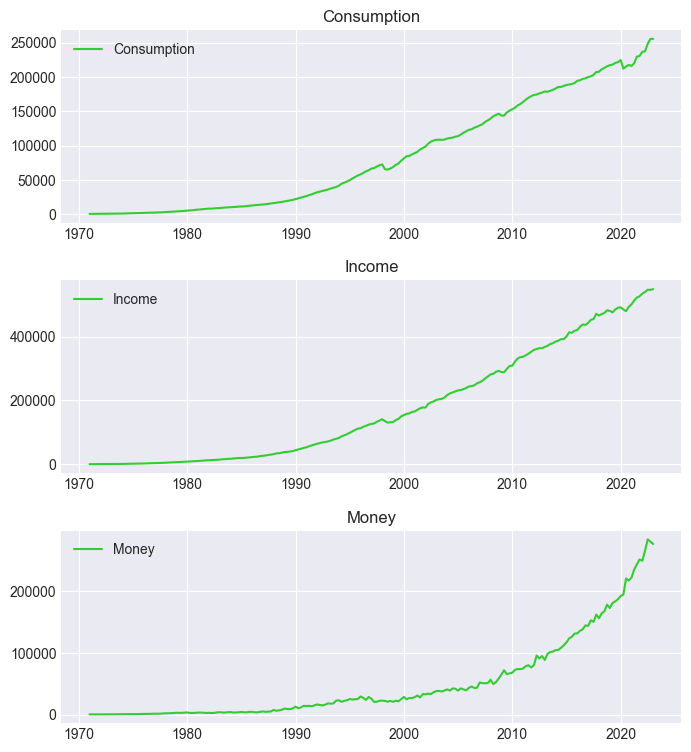

In [5]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,9), sharex=False, sharey=False)
fig.subplots_adjust(hspace = 0.3)

ax[0].plot('Consumption', color='limegreen', label="Consumption", data = Con_In_dt)
ax[0].set_title("Consumption")
ax[0].legend()

ax[1].plot('Income', color='limegreen', label="Income", data = Con_In_dt)
ax[1].set_title("Income")
ax[1].legend()

ax[2].plot('Money', color='limegreen', label="Money", data = Con_In_dt)
ax[2].set_title("Money")
ax[2].legend()

plt.show()

/var/folders/q0/_z0jfx6x3kl7t7fj2g3hmmt40000gn/T/ipykernel_21186/3825596595.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


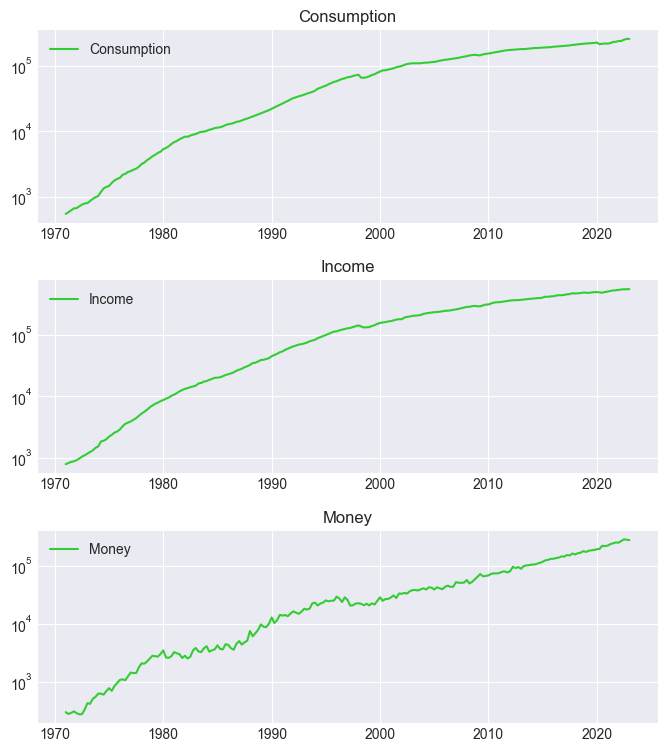

In [6]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,9), sharex=False, sharey=False)
fig.subplots_adjust(hspace = 0.3)

ax[0].plot('Consumption', color='limegreen', label="Consumption", data = Con_In_dt)
ax[0].set_title("Consumption")
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot('Income', color='limegreen', label="Income", data = Con_In_dt)
ax[1].set_title("Income")
ax[1].set_yscale('log')
ax[1].legend()

ax[2].plot('Money', color='limegreen', label="Money", data = Con_In_dt)
ax[2].set_title("Money")
ax[2].set_yscale('log')
ax[2].legend()

plt.show()

# statsmodels

### Univariate Regression

In [6]:
UniFormula = "Consumption ~ Income"
reg_ci = smf.ols(UniFormula, data=Con_In_dt).fit()
reg_ci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.732e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.00e-235
Time:                        22:00:32   Log-Likelihood:                -2109.9
No. Observations:                 209   AIC:                             4224.
Df Residuals:                     207   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4333.5785    582.714      7.437      0.000    3184.763    5482.394
Income         0.4560      0.002    193.186      0.000       0.451       0.461
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.041
Skew:                           0.033   Prob(JB):                        0.980
Kurtosis:                       2.982   Cond. No.                     3.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
UniFormula = "Consumption ~ Money "
reg_cm = smf.ols(UniFormula, data=Con_In_dt).fit()
reg_cm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     968.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           5.37e-80
Time:                        10:21:24   Log-Likelihood:                -2471.9
No. Observations:                 209   AIC:                             4948.
Df Residuals:                     207   BIC:                             4954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.041e+04   2891.012     10.519      0.000    2.47e+04    3.61e+04
Money          1.0648      0.034     31.117      0.000       0.997       1.132
==============================================================================
Omnibus:                       29.887   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.667
Skew:                           0.146   Prob(JB):                       0.0131
Kurtosis:                       2.046   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariate Regression

In [7]:
UniFormula = "Consumption ~ Income + Money "
reg_cmi = smf.ols(UniFormula, data=Con_In_dt).fit()
reg_cmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.671e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.89e-274
Time:                        22:01:05   Log-Likelihood:                -2013.9
No. Observations:                 209   AIC:                             4034.
Df Residuals:                     206   BIC:                             4044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1928.9332    393.366      4.904      0.000    1153.393    2704.473
Income         0.5233      0.004    127.608      0.000       0.515       0.531
Money         -0.1854      0.011    -17.618      0.000      -0.206      -0.165
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.106
Skew:                           1.298   Prob(JB):                    2.02e-100
Kurtosis:                       9.781   Cond. No.                     3.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression with sklearn
LinearRegression().fit(X, y)

In [8]:
Con_In_dt['Income']

date
1970-12-31       787.5
1971-03-31       820.8
1971-06-30       856.4
1971-09-30       873.9
1971-12-31       913.0
                ...   
2021-12-31    534312.8
2022-03-31    539189.3
2022-06-30    546261.6
2022-09-30    545986.1
2022-12-31    548212.6
Name: Income, Length: 209, dtype: float64

In [9]:
Con_In_dt[['Income']]

,Income
date,
1970-12-31,787.5
1971-03-31,820.8
1971-06-30,856.4
1971-09-30,873.9
1971-12-31,913.0
...,...
2021-12-31,534312.8
2022-03-31,539189.3
2022-06-30,546261.6


In [10]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

### scatter(x, y)

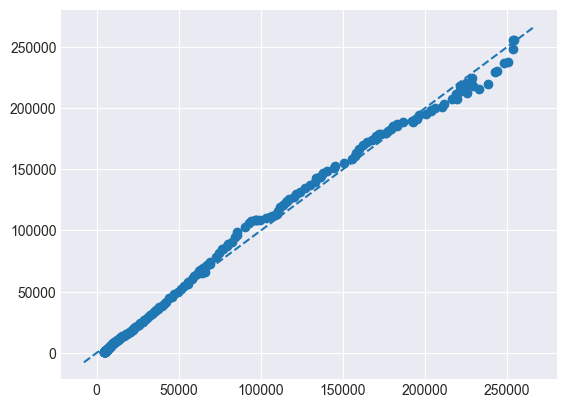

In [11]:
linear = LinearRegression()
linear.fit(Con_In_dt[['Income']], Con_In_dt['Consumption'])

linear_predict = linear.predict(Con_In_dt[['Income']])

plt.scatter(linear_predict, Con_In_dt['Consumption'])

abline(1,0)

In [12]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dt[['Income']],Con_In_dt['Consumption']))

4333.578511718486
[0.45602612]
0.9944840778907063


<Axes: xlabel='Income', ylabel='Consumption'>

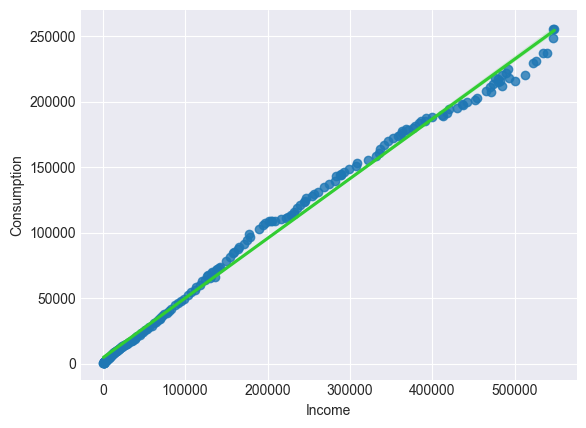

In [13]:
sns.regplot(x="Income", y="Consumption", data=Con_In_dt, line_kws={'color':"limegreen"})

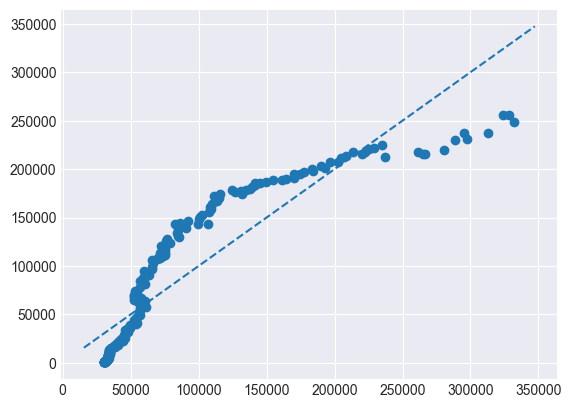

In [14]:
linear = LinearRegression()
linear.fit(Con_In_dt[['Money']], Con_In_dt['Consumption'])

linear_predict = linear.predict(Con_In_dt[['Money']])

plt.scatter(linear_predict, Con_In_dt['Consumption'])
    
abline(1,0)

In [15]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dt[['Money']], Con_In_dt['Consumption']))

30411.119352419642
[1.06480124]
0.8238670013693437


<Axes: xlabel='Money', ylabel='Consumption'>

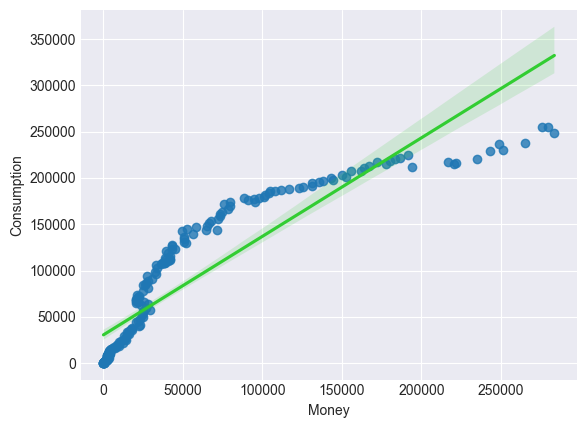

In [16]:
sns.regplot(x="Money", y="Consumption", data=Con_In_dt, line_kws={'color':"limegreen"})

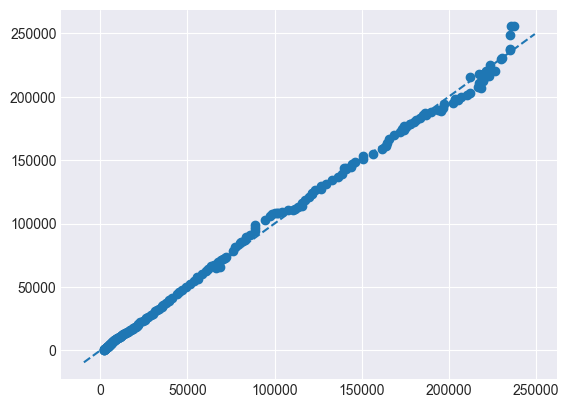

In [17]:
linear = LinearRegression()
linear.fit(Con_In_dt[['Income', 'Money']], Con_In_dt['Consumption'])

linear_predict = linear.predict(Con_In_dt[['Income', 'Money']])

plt.scatter(linear_predict, Con_In_dt['Consumption'])
    
abline(1,0)

In [18]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dt[['Income', 'Money']], Con_In_dt['Consumption']))

1928.9332402760047
[ 0.52330872 -0.18535149]
0.9977996535453327


In [19]:
Con_In_dt['Income']

date
1970-12-31       787.5
1971-03-31       820.8
1971-06-30       856.4
1971-09-30       873.9
1971-12-31       913.0
                ...   
2021-12-31    534312.8
2022-03-31    539189.3
2022-06-30    546261.6
2022-09-30    545986.1
2022-12-31    548212.6
Name: Income, Length: 209, dtype: float64

## Unit Root Test

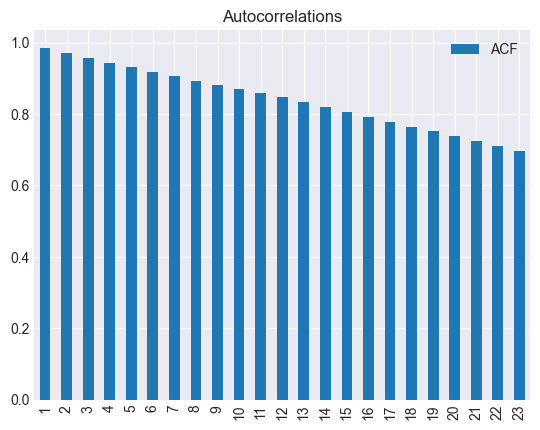

In [20]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_dt['Consumption']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

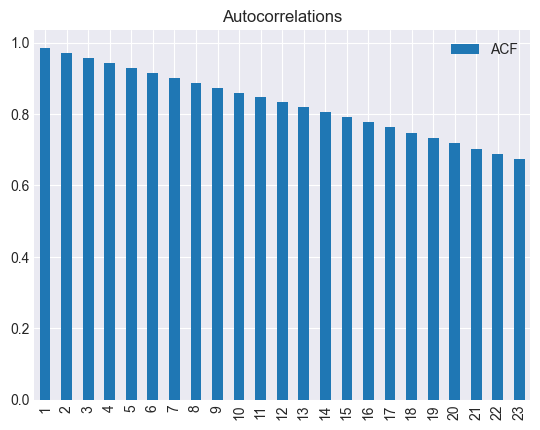

In [21]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_dt['Income']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

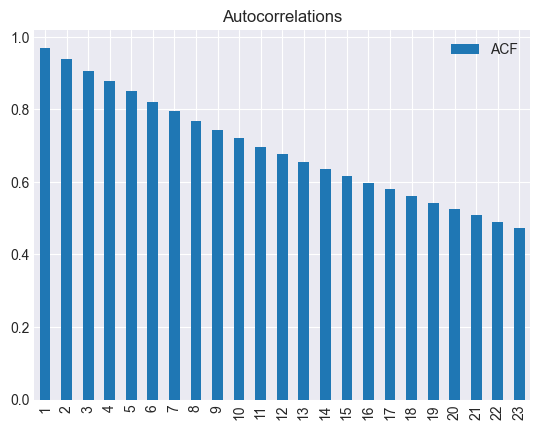

In [22]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_dt['Money']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

In [23]:
# trend c, ct, ctt 일때 확인 필요
# Null Hypothesis : 
adf = ADF(Con_In_dt['Consumption'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.160
P-value                         0.513
Lags                               10
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [24]:
adf = ADF(Con_In_dt['Income'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.014
P-value                         0.594
Lags                               15
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [25]:
adf = ADF(Con_In_dt['Money'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  4.854
P-value                         1.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Differencing

In [26]:
Con_In_Diff_dt = pd.DataFrame()

Con_In_Diff_dt['Consumption'] = Con_In_dt['Consumption'].diff(1).dropna()
Con_In_Diff_dt['Income'] = Con_In_dt['Income'].diff(1).dropna()
Con_In_Diff_dt['Money'] = Con_In_dt['Money'].diff(1).dropna()

In [27]:
Con_In_Diff_dt.corr()

,Consumption,Income,Money
Consumption,1.000000,0.553586,0.165653
Income,0.553586,1.000000,0.198783
Money,0.165653,0.198783,1.000000


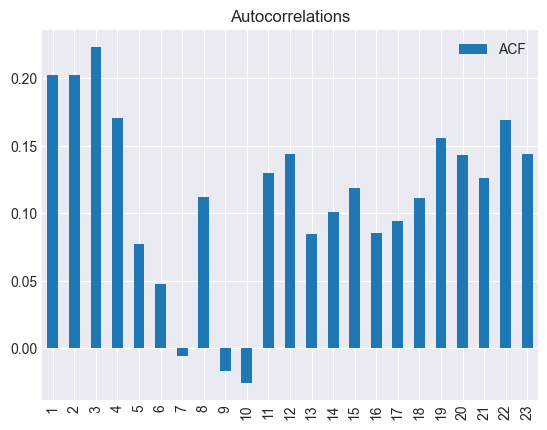

In [28]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_Diff_dt['Consumption']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

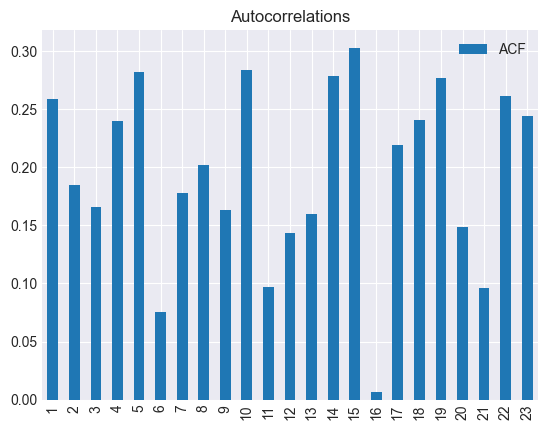

In [29]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_Diff_dt['Income']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

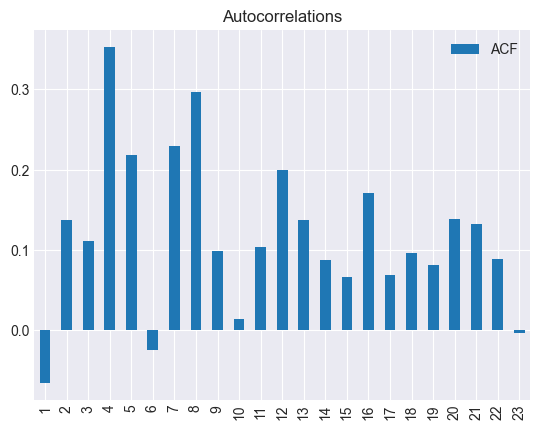

In [30]:
acf = pd.DataFrame(sm.tsa.stattools.acf(Con_In_Diff_dt['Money']), columns=["ACF"])
fig = acf[1:].plot(kind="bar", title="Autocorrelations")

In [31]:
adf = ADF(Con_In_Diff_dt['Consumption'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.360
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [32]:
adf = ADF(Con_In_Diff_dt['Income'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.437
P-value                         0.002
Lags                               15
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [33]:
adf = ADF(Con_In_Diff_dt['Money'], trend = 'ct')
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  0.360
P-value                         0.996
Lags                               13
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [34]:
Con_In_Diff_dt

,Consumption,Income,Money
date,,,
1971-03-31,32.6,33.3,-20.5
1971-06-30,39.8,35.6,11.2
1971-09-30,43.9,17.5,18.4
1971-12-31,6.6,39.1,-20.5
1972-03-31,42.2,55.5,-14.1
...,...,...,...
2021-12-31,6131.3,8566.2,-2274.6
2022-03-31,524.6,4876.5,16415.3
2022-06-30,11046.9,7072.3,18269.0


In [35]:
UniFormula = "Consumption ~ Income"
reg_ci = smf.ols(UniFormula, data=Con_In_Diff_dt).fit()
reg_ci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     91.03
Date:                Mon, 29 May 2023   Prob (F-statistic):           4.24e-18
Time:                        22:02:31   Log-Likelihood:                -1826.4
No. Observations:                 208   AIC:                             3657.
Df Residuals:                     206   BIC:                             3663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.0138    138.432      3.034      0.003     147.089     692.938
Income         0.3061      0.032      9.541      0.000       0.243       0.369
==============================================================================
Omnibus:                       69.244   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2486.156
Skew:                          -0.395   Prob(JB):                         0.00
Kurtosis:                      19.919   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
UniFormula = "Consumption ~ Money "
reg_cm = smf.ols(UniFormula, data=Con_In_Diff_dt).fit()
reg_cm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.812
Date:                Mon, 29 May 2023   Prob (F-statistic):             0.0168
Time:                        22:02:32   Log-Likelihood:                -1861.5
No. Observations:                 208   AIC:                             3727.
Df Residuals:                     206   BIC:                             3734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1121.1458    136.941      8.187      0.000     851.160    1391.132
Money          0.0789      0.033      2.411      0.017       0.014       0.143
==============================================================================
Omnibus:                      100.157   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.953
Skew:                          -1.174   Prob(JB):                         0.00
Kurtosis:                      21.211   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
UniFormula = "Consumption ~ Income + Money "
reg_cmi = smf.ols(UniFormula, data=Con_In_Diff_dt).fit()
reg_cmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     45.98
Date:                Mon, 29 May 2023   Prob (F-statistic):           3.18e-17
Time:                        22:02:32   Log-Likelihood:                -1825.9
No. Observations:                 208   AIC:                             3658.
Df Residuals:                     205   BIC:                             3668.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    400.2331    139.916      2.861      0.005     124.373     676.093
Income         0.2998      0.033      9.155      0.000       0.235       0.364
Money          0.0276      0.028      0.978      0.329      -0.028       0.083
==============================================================================
Omnibus:                       74.787   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2406.998
Skew:                          -0.596   Prob(JB):                         0.00
Kurtosis:                      19.623   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dynamic Regression

In [38]:
dlm_res = DynamicOLS(Con_In_dt['Consumption'], Con_In_dt['Income']).fit()
dlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Dynamic OLS Cointegrating Vector Summary                   
==============================================================================
Trend:                       Constant   No. Observations:                  196
Leads:                             12   R²:                             0.9972
Lags:                               0   Adjusted. R²:                   0.9970
Cov Type:                  unadjusted   Residual Variance:           1.446e+07
Kernel:                      Bartlett   Long-run Variance:           1.396e+08
Bandwidth:                     12.327                                         
                             Cointegrating Vector                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Income         0.4345     0.0095     45.559     0.0000      0.4158      0.4532
const         -519.83     1589.1    -0.3271     0.7436     -3634.4      2594.8
==============================================================================
"""

In [39]:
# ppt 174p 확인
# lags:
# leads :
dlm_res = DynamicOLS(Con_In_dt['Consumption'], Con_In_dt['Income'], lags=8, leads=8).fit()
dlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Dynamic OLS Cointegrating Vector Summary                   
==============================================================================
Trend:                       Constant   No. Observations:                  192
Leads:                              8   R²:                             0.9971
Lags:                               8   Adjusted. R²:                   0.9968
Cov Type:                  unadjusted   Residual Variance:           1.569e+07
Kernel:                      Bartlett   Long-run Variance:           1.417e+08
Bandwidth:                     12.132                                         
                             Cointegrating Vector                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Income         0.4187     0.0108     38.654     0.0000      0.3975      0.4399
const         -842.72     1706.0    -0.4940     0.6213     -4186.3      2500.9
==============================================================================
"""

In [40]:
dlm_res = DynamicOLS(Con_In_dt['Consumption'], Con_In_dt['Income'], trend = 'ct').fit()
dlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Dynamic OLS Cointegrating Vector Summary                     
==================================================================================
Trend:             Const and Linear Trend   No. Observations:                  208
Leads:                                  0   R²:                             0.9963
Lags:                                   0   Adjusted. R²:                   0.9963
Cov Type:                      unadjusted   Residual Variance:           2.285e+07
Kernel:                          Bartlett   Long-run Variance:            2.42e+08
Bandwidth:                         12.731                                         
                             Cointegrating Vector                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Income         0.3900     0.0218     17.909     0.0000      0.3473      0.4327
const         -4613.7     3240.3    -1.4238     0.1545  -1.096e+04      1737.2
trend          198.45     63.759     3.1126     0.0019      73.489      323.42
==============================================================================
"""

In [41]:
dlm_res = DynamicOLS(Con_In_dt['Consumption'], Con_In_dt['Money']).fit()
dlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Dynamic OLS Cointegrating Vector Summary                   
==============================================================================
Trend:                       Constant   No. Observations:                  208
Leads:                              0   R²:                             0.8246
Lags:                               0   Adjusted. R²:                   0.8229
Cov Type:                  unadjusted   Residual Variance:           1.093e+09
Kernel:                      Bartlett   Long-run Variance:           1.373e+10
Bandwidth:                     13.041                                         
                             Cointegrating Vector                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Money          1.0821     0.1360     7.9548     0.0000      0.8155      1.3488
const       3.059e+04  1.021e+04     2.9948     0.0027   1.057e+04   5.061e+04
==============================================================================
"""

In [45]:
dlm_res = DynamicOLS(Con_In_dt['Consumption'], Con_In_dt[['Income','Money']], trend = 'ct').fit()
dlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Dynamic OLS Cointegrating Vector Summary                     
==================================================================================
Trend:             Const and Linear Trend   No. Observations:                  207
Leads:                                  1   R²:                             0.9984
Lags:                                   0   Adjusted. R²:                   0.9983
Cov Type:                      unadjusted   Residual Variance:           9.786e+06
Kernel:                          Bartlett   Long-run Variance:           6.512e+07
Bandwidth:                         11.634                                         
                             Cointegrating Vector                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Income         0.4920     0.0199     24.730     0.0000      0.4530      0.5310
Money         -0.1648     0.0290    -5.6819     0.0000     -0.2216     -0.1079
const         -1318.7     1767.1    -0.7463     0.4555     -4782.2      2144.7
trend          78.276     38.894     2.0125     0.0442      2.0444      154.51
==============================================================================
"""

### Transformation (Standardization)

In [46]:
Con_In_dtn = pd.DataFrame()
Con_In_dtn['Consumption'] = Con_In_dt['Consumption']
rescale_col = ['Income', 'Money']

In [47]:
for VarName in rescale_col:
    Con_In_dtn[VarName] = (Con_In_dt[VarName] - Con_In_dt[VarName].mean()) / Con_In_dt[VarName].std()
    print(VarName)

Income
Money


In [48]:
Con_In_dtn

,Consumption,Income,Money
date,,,
1970-12-31,551.1,-1.015034,-0.752706
1971-03-31,583.7,-1.014841,-0.753010
1971-06-30,623.5,-1.014636,-0.752844
1971-09-30,667.4,-1.014535,-0.752571
1971-12-31,674.0,-1.014309,-0.752875
...,...,...,...
2021-12-31,236806.5,2.067953,2.930853
2022-03-31,237331.1,2.096132,3.174193
2022-06-30,248378.0,2.136999,3.445013


In [49]:
with pd.option_context('display.float_format', '{:0.6f}'.format):

   print(Con_In_dtn.describe())

        Consumption     Income      Money
count    209.000000 209.000000 209.000000
mean   84796.594258   0.000000   0.000000
std    79136.018235   1.000000   1.000000
min      551.100000  -1.015034  -0.753084
25%    10148.000000  -0.917855  -0.704406
50%    65078.000000  -0.287819  -0.415012
75%   153071.800000   0.764167   0.305885
max   255489.200000   2.148273   3.445013


In [50]:
Con_In_dtn.corr()

,Consumption,Income,Money
Consumption,1.000000,0.997238,0.907671
Income,0.997238,1.000000,0.931228
Money,0.907671,0.931228,1.000000


In [51]:
UniFormula = "Consumption ~ Income"
reg_ci = smf.ols(UniFormula, data=Con_In_dtn).fit()
reg_ci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.732e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          1.00e-235
Time:                        10:37:58   Log-Likelihood:                -2109.9
No. Observations:                 209   AIC:                             4224.
Df Residuals:                     207   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.48e+04    407.527    208.076      0.000     8.4e+04    8.56e+04
Income      7.892e+04    408.506    193.186      0.000    7.81e+04    7.97e+04
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.041
Skew:                           0.033   Prob(JB):                        0.980
Kurtosis:                       2.982   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

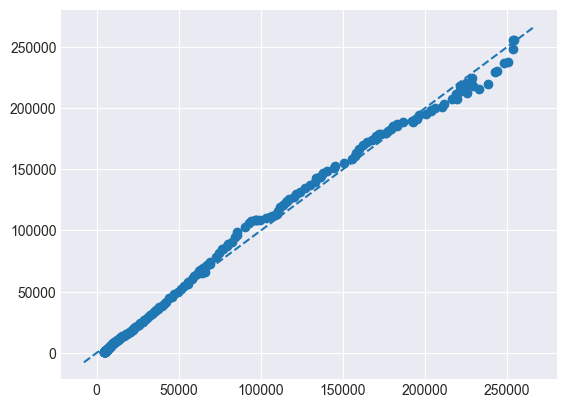

In [52]:
linear = LinearRegression()
linear.fit(Con_In_dtn[['Income']], Con_In_dtn['Consumption'])

linear_predict = linear.predict(Con_In_dtn[['Income']])

plt.scatter(linear_predict, Con_In_dtn['Consumption'])
    
abline(1,0)

In [53]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dtn[['Income']], Con_In_dt['Consumption']))

84796.5942583732
[78917.46237775]
0.9944840778907063


### y ~ beta[(x - m) / sigma ]

In [54]:
Con_In_dt['Income'].std()

173054.69876866133

In [55]:
linear.coef_ / Con_In_dt['Income'].std()

array([0.45602612])

In [56]:
UniFormula = "Consumption ~ Money"
reg_ci = smf.ols(UniFormula, data=Con_In_dtn).fit()
reg_ci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     968.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           5.37e-80
Time:                        10:38:37   Log-Likelihood:                -2471.9
No. Observations:                 209   AIC:                             4948.
Df Residuals:                     207   BIC:                             4954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.48e+04   2302.862     36.822      0.000    8.03e+04    8.93e+04
Money       7.183e+04   2308.391     31.117      0.000    6.73e+04    7.64e+04
==============================================================================
Omnibus:                       29.887   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.667
Skew:                           0.146   Prob(JB):                       0.0131
Kurtosis:                       2.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

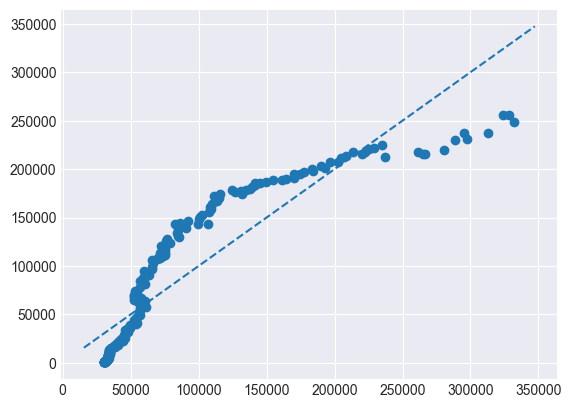

In [57]:
linear = LinearRegression()
linear.fit(Con_In_dtn[['Money']], Con_In_dtn['Consumption'])

linear_predict = linear.predict(Con_In_dtn[['Money']])

plt.scatter(linear_predict, Con_In_dtn['Consumption'])
    
abline(1,0)

In [58]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dtn[['Money']], Con_In_dtn['Consumption']))

84796.5942583732
[71829.48437571]
0.8238670013693437


In [59]:
linear.coef_ / Con_In_dt['Money'].std()

array([1.06480124])

In [60]:
UniFormula = "Consumption ~ Income + Money"
reg_ci = smf.ols(UniFormula, data=Con_In_dtn).fit()
reg_ci.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.671e+04
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          1.89e-274
Time:                        10:38:53   Log-Likelihood:                -2013.9
No. Observations:                 209   AIC:                             4034.
Df Residuals:                     206   BIC:                             4044.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    8.48e+04    258.015    328.650      0.000    8.43e+04    8.53e+04
Income      9.056e+04    709.680    127.608      0.000    8.92e+04     9.2e+04
Money       -1.25e+04    709.680    -17.618      0.000   -1.39e+04   -1.11e+04
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.106
Skew:                           1.298   Prob(JB):                    2.02e-100
Kurtosis:                       9.781   Cond. No.                         5.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

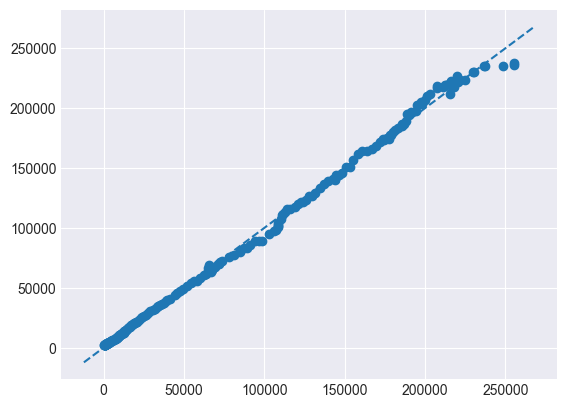

In [61]:
linear = LinearRegression()
linear.fit(Con_In_dtn[['Income', 'Money']], Con_In_dt['Consumption'])

linear_predict = linear.predict(Con_In_dtn[['Income', 'Money']])

plt.scatter(Con_In_dt['Consumption'], linear_predict)
    
abline(1,0)

In [62]:
print(linear.intercept_)
print(linear.coef_)
print(linear.score(Con_In_dtn[['Income', 'Money']], Con_In_dt['Consumption']))

84796.5942583732
[ 90561.03309692 -12503.46203004]
0.9977996535453327


In [63]:
print(linear.coef_[0] / Con_In_dt['Income'].std())
print(linear.coef_[1] / Con_In_dt['Money'].std())

0.5233087211228111
-0.1853514895536334


### LASSO

In [64]:
regLasso = Lasso(alpha=1)
regLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

regLasso.coef_

array([ 90543.42974053, -12486.06448851])

In [65]:
regLasso = Lasso(alpha=1500)
regLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

regLasso.coef_

array([77410.25083929,    -0.        ])

In [66]:
np.linspace(1,1500,100)

array([1.00000000e+00, 1.61414141e+01, 3.12828283e+01, 4.64242424e+01,
       6.15656566e+01, 7.67070707e+01, 9.18484848e+01, 1.06989899e+02,
       1.22131313e+02, 1.37272727e+02, 1.52414141e+02, 1.67555556e+02,
       1.82696970e+02, 1.97838384e+02, 2.12979798e+02, 2.28121212e+02,
       2.43262626e+02, 2.58404040e+02, 2.73545455e+02, 2.88686869e+02,
       3.03828283e+02, 3.18969697e+02, 3.34111111e+02, 3.49252525e+02,
       3.64393939e+02, 3.79535354e+02, 3.94676768e+02, 4.09818182e+02,
       4.24959596e+02, 4.40101010e+02, 4.55242424e+02, 4.70383838e+02,
       4.85525253e+02, 5.00666667e+02, 5.15808081e+02, 5.30949495e+02,
       5.46090909e+02, 5.61232323e+02, 5.76373737e+02, 5.91515152e+02,
       6.06656566e+02, 6.21797980e+02, 6.36939394e+02, 6.52080808e+02,
       6.67222222e+02, 6.82363636e+02, 6.97505051e+02, 7.12646465e+02,
       7.27787879e+02, 7.42929293e+02, 7.58070707e+02, 7.73212121e+02,
       7.88353535e+02, 8.03494949e+02, 8.18636364e+02, 8.33777778e+02,
      

In [67]:
Con_In_dtn[['Income', 'Money']]

,Income,Money
date,,
1970-12-31,-1.015034,-0.752706
1971-03-31,-1.014841,-0.753010
1971-06-30,-1.014636,-0.752844
1971-09-30,-1.014535,-0.752571
1971-12-31,-1.014309,-0.752875
...,...,...
2021-12-31,2.067953,2.930853
2022-03-31,2.096132,3.174193
2022-06-30,2.136999,3.445013


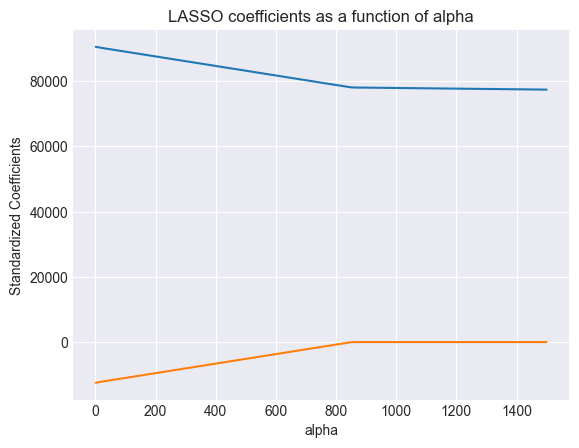

In [68]:
alphas = np.linspace(1,1500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('LASSO coefficients as a function of alpha');

In [69]:
coefs

[array([ 90543.42974053, -12486.06448851]),
 array([ 90281.12302141, -12226.58298523]),
 array([ 90046.41985818, -11992.80667899]),
 array([ 89826.25077608, -11772.5649123 ]),
 array([ 89606.08169398, -11552.32314561]),
 array([ 89385.91261187, -11332.08137892]),
 array([ 89165.74352977, -11111.83961224]),
 array([ 88945.57444767, -10891.59784555]),
 array([ 88725.40536556, -10671.35607886]),
 array([ 88505.23628346, -10451.11431217]),
 array([ 88277.5479087 , -10223.87037156]),
 array([ 88057.54069571, -10003.77934188]),
 array([87837.53348273, -9783.68831221]),
 array([87617.52626974, -9563.59728253]),
 array([87397.51905675, -9343.50625285]),
 array([87177.51184377, -9123.41522318]),
 array([86957.50463078, -8903.3241935 ]),
 array([86730.13312062, -8676.37532599]),
 array([86510.31256803, -8456.45811966]),
 array([86290.49201544, -8236.54091332]),
 array([86070.67146285, -8016.62370698]),
 array([85850.85091026, -7796.70650065]),
 array([85623.61441484, -7569.88336261]),
 array([85

In [70]:
regLasso = Lasso(alpha=1000)
regLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dt['Consumption'])

regLasso.coef_

array([77912.65468544,    -0.        ])

In [71]:
regLasso.coef_[0] / Con_In_dt['Income'].std()

0.45021981627665947

### Ridge

In [72]:
regRidge = Ridge(alpha=1)
regRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

regRidge.coef_

array([87097.01229646, -9233.27899578])

In [73]:
regRidge = Ridge(alpha=1000)
regRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

regRidge.coef_

array([11911.55382809, 10458.04629056])

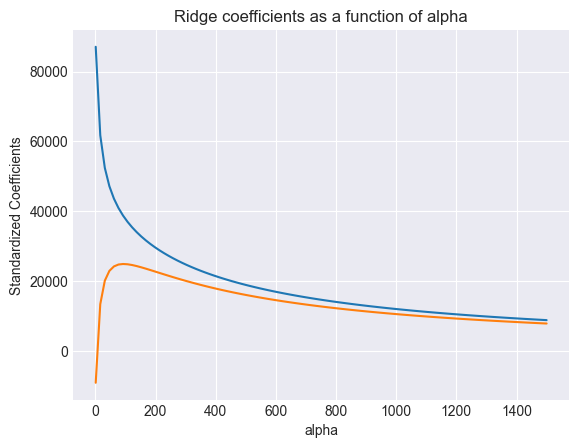

In [74]:
alphas = np.linspace(1,1500,100)
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha');

In [75]:
regRidge = Ridge(alpha=100)
regRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

regRidge.coef_

array([37698.39890319, 24800.41366854])

In [76]:
print(regRidge.coef_[0] / Con_In_dt['Income'].std())
print(regRidge.coef_[1] / Con_In_dt['Money'].std())

0.21784094376763008
0.3676416662814203


### Cross Validation LASSO 

In [77]:
modelLasso = LassoCV(cv=5, alphas=np.linspace(1,1500,100), random_state=0, max_iter=10000, verbose = 2)
modelLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

Path: 000 out of 100
Path: 001 out of 100
Path: 002 out of 100
Path: 003 out of 100
Path: 004 out of 100
Path: 005 out of 100
Path: 006 out of 100
Path: 007 out of 100
Path: 008 out of 100
Path: 009 out of 100
Path: 010 out of 100
Path: 011 out of 100
Path: 012 out of 100
Path: 013 out of 100
Path: 014 out of 100
Path: 015 out of 100
Path: 016 out of 100
Path: 017 out of 100
Path: 018 out of 100
Path: 019 out of 100
Path: 020 out of 100
Path: 021 out of 100
Path: 022 out of 100
Path: 023 out of 100
Path: 024 out of 100
Path: 025 out of 100
Path: 026 out of 100
Path: 027 out of 100
Path: 028 out of 100
Path: 029 out of 100
Path: 030 out of 100
Path: 031 out of 100
Path: 032 out of 100
Path: 033 out of 100
Path: 034 out of 100
Path: 035 out of 100
Path: 036 out of 100
Path: 037 out of 100
Path: 038 out of 100
Path: 039 out of 100
Path: 040 out of 100
Path: 041 out of 100
Path: 042 out of 100
Path: 043 out of 100
Path: 044 out of 100
Path: 045 out of 100
Path: 046 out of 100
Path: 047 out

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


LassoCV(alphas=array([1.00000000e+00, 1.61414141e+01, 3.12828283e+01, 4.64242424e+01,
       6.15656566e+01, 7.67070707e+01, 9.18484848e+01, 1.06989899e+02,
       1.22131313e+02, 1.37272727e+02, 1.52414141e+02, 1.67555556e+02,
       1.82696970e+02, 1.97838384e+02, 2.12979798e+02, 2.28121212e+02,
       2.43262626e+02, 2.58404040e+02, 2.73545455e+02, 2.88686869e+02,
       3.03828283e+02, 3.18969697e+0...
       1.15174747e+03, 1.16688889e+03, 1.18203030e+03, 1.19717172e+03,
       1.21231313e+03, 1.22745455e+03, 1.24259596e+03, 1.25773737e+03,
       1.27287879e+03, 1.28802020e+03, 1.30316162e+03, 1.31830303e+03,
       1.33344444e+03, 1.34858586e+03, 1.36372727e+03, 1.37886869e+03,
       1.39401010e+03, 1.40915152e+03, 1.42429293e+03, 1.43943434e+03,
       1.45457576e+03, 1.46971717e+03, 1.48485859e+03, 1.50000000e+03]),
        cv=5, max_iter=10000, random_state=0, verbose=2)

In [78]:
print(modelLasso.alpha_)
print(modelLasso.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))

16.141414141414142
0.9977979499060738


In [79]:
regLasso = Lasso(alpha=modelLasso.alpha_)
regLassores = regLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

print(regLasso.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))
regLasso.coef_

0.9977979499060738


array([ 90281.12302141, -12226.58298523])

In [80]:
regLasso = Lasso(alpha=1000)
regLassores = regLasso.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

print(regLasso.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))
regLasso.coef_

0.994322858411913


array([77912.65468544,    -0.        ])

### Cross Validation Ridge

In [81]:
modelRidge = RidgeCV(cv=5, alphas=np.linspace(1,1500,100))
modelRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

RidgeCV(alphas=array([1.00000000e+00, 1.61414141e+01, 3.12828283e+01, 4.64242424e+01,
       6.15656566e+01, 7.67070707e+01, 9.18484848e+01, 1.06989899e+02,
       1.22131313e+02, 1.37272727e+02, 1.52414141e+02, 1.67555556e+02,
       1.82696970e+02, 1.97838384e+02, 2.12979798e+02, 2.28121212e+02,
       2.43262626e+02, 2.58404040e+02, 2.73545455e+02, 2.88686869e+02,
       3.03828283e+02, 3.18969697e+0...
       1.15174747e+03, 1.16688889e+03, 1.18203030e+03, 1.19717172e+03,
       1.21231313e+03, 1.22745455e+03, 1.24259596e+03, 1.25773737e+03,
       1.27287879e+03, 1.28802020e+03, 1.30316162e+03, 1.31830303e+03,
       1.33344444e+03, 1.34858586e+03, 1.36372727e+03, 1.37886869e+03,
       1.39401010e+03, 1.40915152e+03, 1.42429293e+03, 1.43943434e+03,
       1.45457576e+03, 1.46971717e+03, 1.48485859e+03, 1.50000000e+03]),
        cv=5)

In [82]:
print(modelRidge.alpha_)
print(modelRidge.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))

1.0
0.9975448555433803


In [83]:
regRidge = Ridge(alpha=modelRidge.alpha_)
regRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

print(regRidge.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))
regRidge.coef_

0.9975448555433803


array([87097.01229646, -9233.27899578])

In [84]:
regRidge = Ridge(alpha=1000)
regRidge.fit(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption'])

print(regRidge.score(Con_In_dtn[['Income', 'Money']], Con_In_dtn['Consumption']))
regRidge.coef_

0.4629432546635076


array([11911.55382809, 10458.04629056])